In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os 
import sys
import warnings
warnings.filterwarnings('ignore')

## Data Ingestion

In [2]:
stock_data = pd.read_csv('sample_data.csv')

In [3]:
stock_data

,date,price,type,Continuous-target,class-target
0,2015-12-02,210.615,open,-2.086,0
1,2015-12-02,208.529,close,0.301,1
2,2015-12-03,208.830,open,-3.220,0
3,2015-12-03,205.610,close,0.470,1
4,2015-12-04,206.080,open,3.540,1
...,...,...,...,...,...
3901,2023-09-01,451.190,close,-0.460,0
3902,2023-09-05,450.730,open,-1.490,0
3903,2023-09-05,449.240,close,-0.840,0
3904,2023-09-06,448.400,open,-2.180,0


In [4]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3906 entries, 0 to 3905
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               3906 non-null   object 
 1   price              3906 non-null   float64
 2   type               3906 non-null   object 
 3   Continuous-target  3905 non-null   float64
 4   class-target       3906 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 152.7+ KB


In [5]:
stock_data['date'] = pd.to_datetime(stock_data['date'])

In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3906 entries, 0 to 3905
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               3906 non-null   datetime64[ns]
 1   price              3906 non-null   float64       
 2   type               3906 non-null   object        
 3   Continuous-target  3905 non-null   float64       
 4   class-target       3906 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 152.7+ KB


In [7]:
# label encoding
from sklearn.preprocessing import LabelEncoder

In [8]:
encoding = LabelEncoder()

In [9]:
stock_data['type'] = encoding.fit_transform(stock_data['type'])

In [10]:
stock_data = stock_data.set_index('date')

In [11]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3906 entries, 2015-12-02 to 2023-09-06
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              3906 non-null   float64
 1   type               3906 non-null   int64  
 2   Continuous-target  3905 non-null   float64
 3   class-target       3906 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 152.6 KB


In [12]:
stock_data.head(2)

,price,type,Continuous-target,class-target
date,,,,
2015-12-02,210.615,1,-2.086,0
2015-12-02,208.529,0,0.301,1


## EDA (Exploratory Data Analysis)

In [13]:
stock_data.describe()

,price,type,Continuous-target,class-target
count,3906.000000,3906.000000,3905.000000,3906.000000
mean,319.155008,0.500000,0.060334,0.549411
std,81.338024,0.500064,2.640166,0.497616
min,182.340000,0.000000,-29.020000,0.000000
25%,254.160000,0.000000,-0.840000,0.000000
50%,293.990000,0.500000,0.160000,1.000000
75%,396.045000,1.000000,1.160000,1.000000
max,479.220000,1.000000,16.970000,1.000000


In [14]:
#missing value
stock_data.isnull().sum()

price                0
type                 0
Continuous-target    1
class-target         0
dtype: int64

In [15]:
stock_data=stock_data.dropna()

In [16]:
stock_data.isnull().sum()

price                0
type                 0
Continuous-target    0
class-target         0
dtype: int64

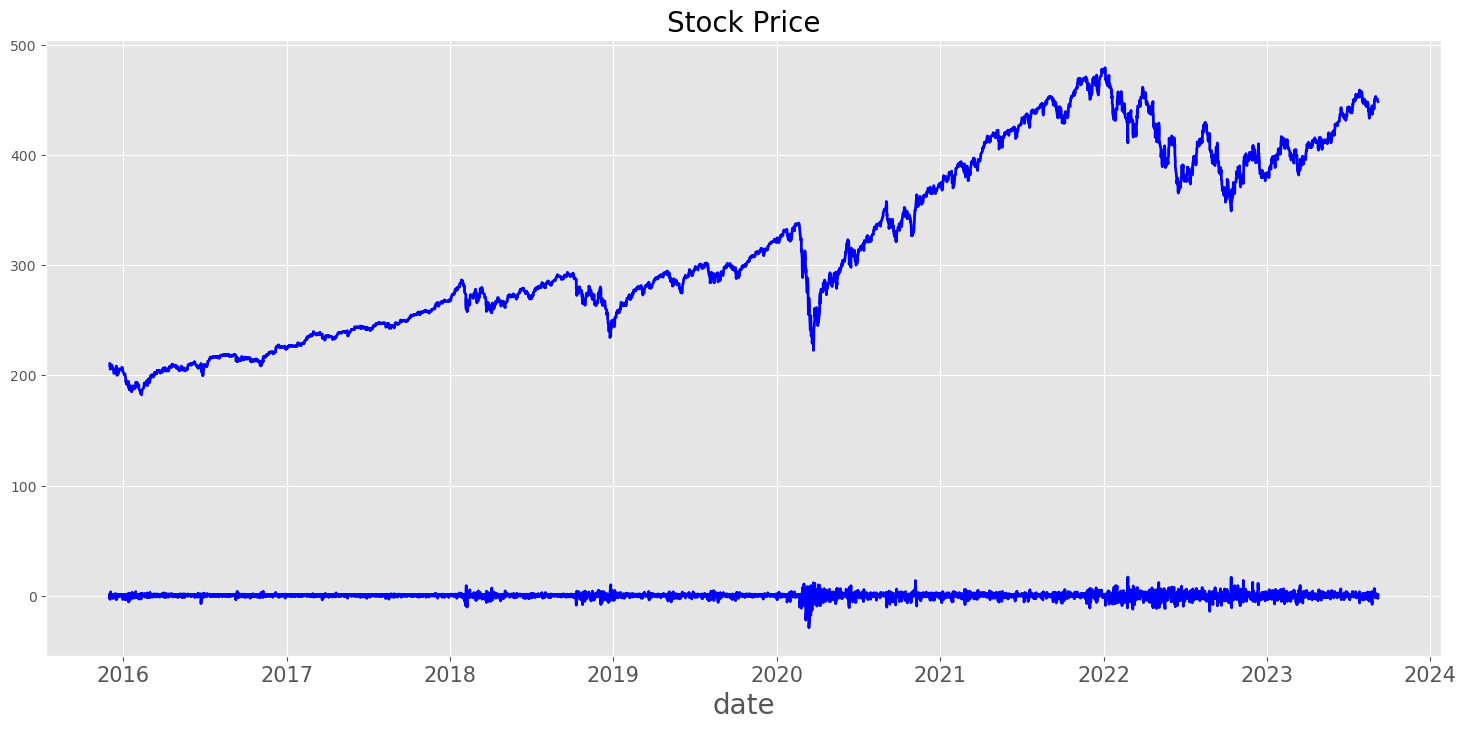

In [17]:
# visualization
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('date', fontsize=20)
plt.xticks(fontsize=15)
plt.plot(stock_data, linewidth=2,color='blue')
plt.title('Stock Price', fontsize=20)
plt.show()

In [18]:
# ADA (Ada fuller Test)
from statsmodels.tsa.stattools import adfuller
adft=adfuller(stock_data['price'])
pd.Series(adft[0:4], index=['test stats','p value', 'lag', 'data points'])

test stats       -0.848182
p value           0.804558
lag              18.000000
data points    3886.000000
dtype: float64

In [19]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

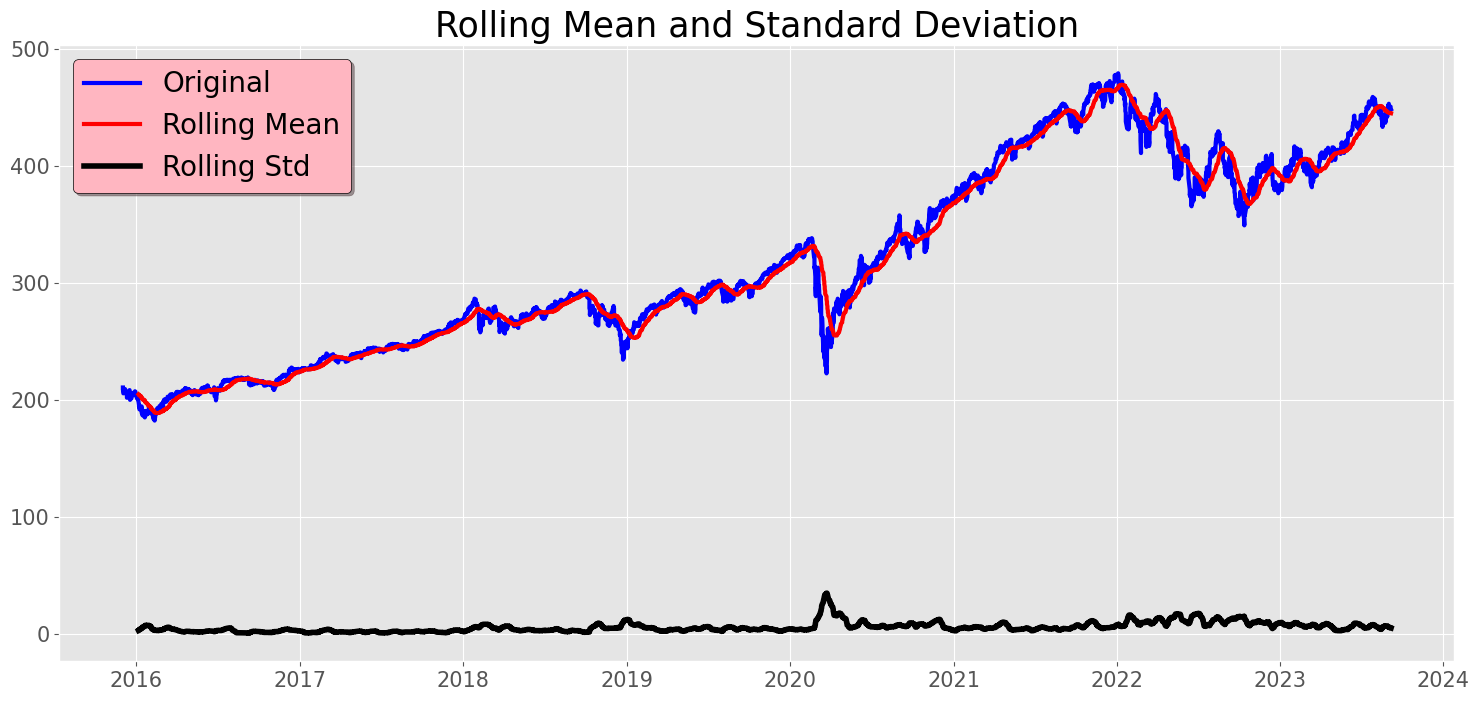

Results of dickey fuller test
Test Statistics                  -0.848182
p-value                           0.804558
No. of lags used                 18.000000
Number of observations used    3886.000000
critical value (1%)              -3.432034
critical value (5%)              -2.862284
critical value (10%)             -2.567166
dtype: float64


In [20]:
test_stationarity(stock_data['price'])

In [21]:
## Seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data[['price']], period=12, model='multiplicative')

In [22]:
result.seasonal

date
2015-12-02    1.000016
2015-12-02    1.000254
2015-12-03    1.000626
2015-12-03    0.999814
2015-12-04    0.999834
                ...   
2023-09-01    1.000016
2023-09-01    1.000254
2023-09-05    1.000626
2023-09-05    0.999814
2023-09-06    0.999834
Name: seasonal, Length: 3905, dtype: float64

<Figure size 2000x1000 with 0 Axes>

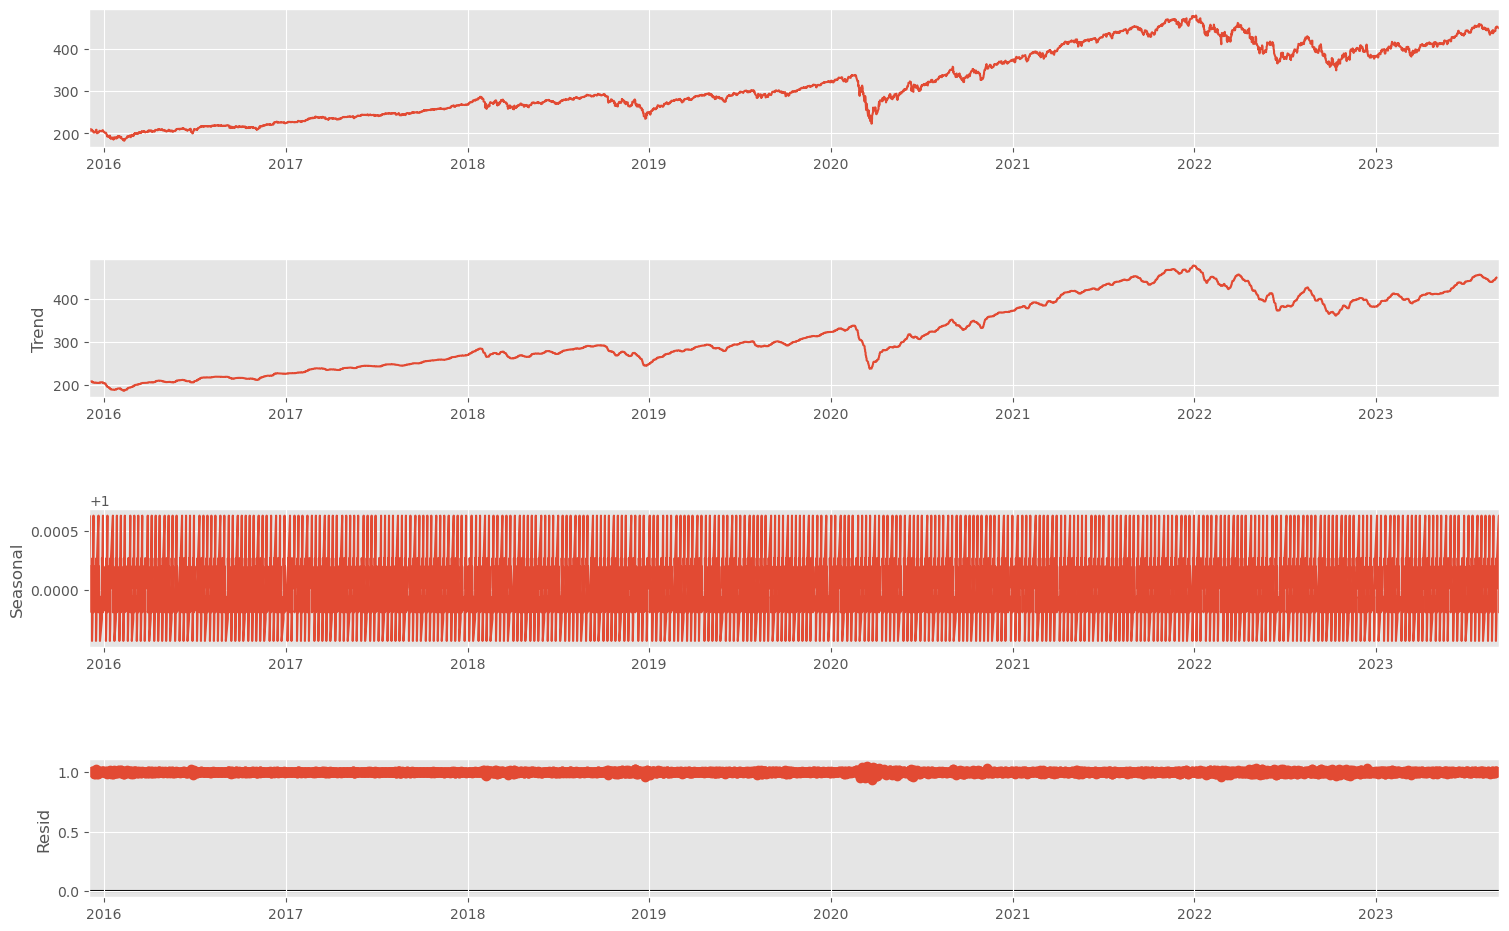

In [23]:
fig= plt.figure(figsize=(20,10))
fig = result.plot()
fig.set_size_inches(17,10)

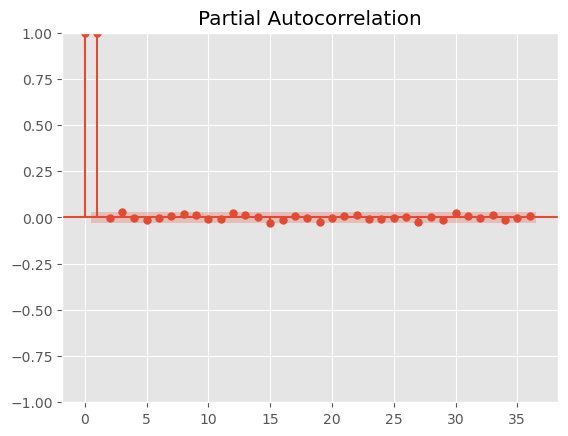

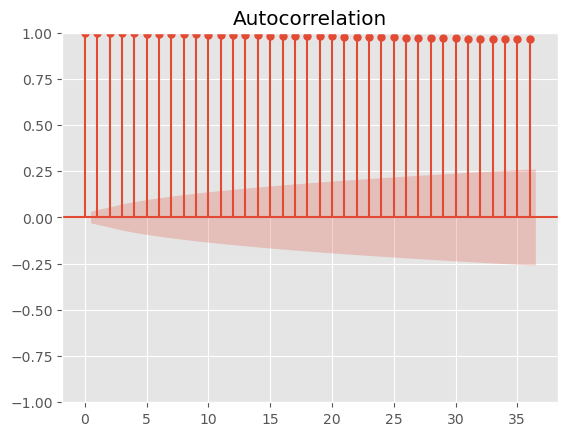

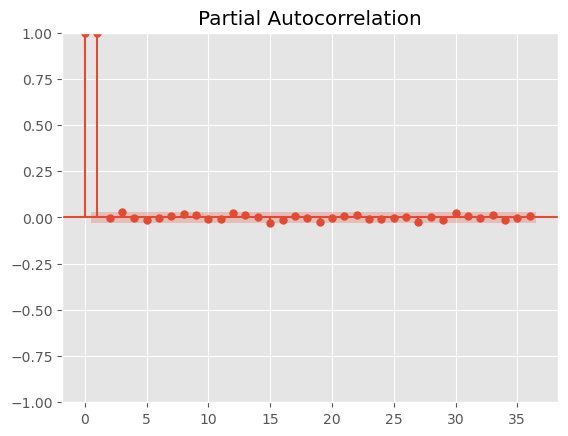

In [24]:
# auto correlation and partial auto correlation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(stock_data['price'])
plot_pacf(stock_data['price'])

## Preprocessing of the data

In [25]:
# Non stationary to stationary time series

In [26]:
df_close = stock_data['price']
df_close = df_close.diff()
df_close = df_close.dropna()

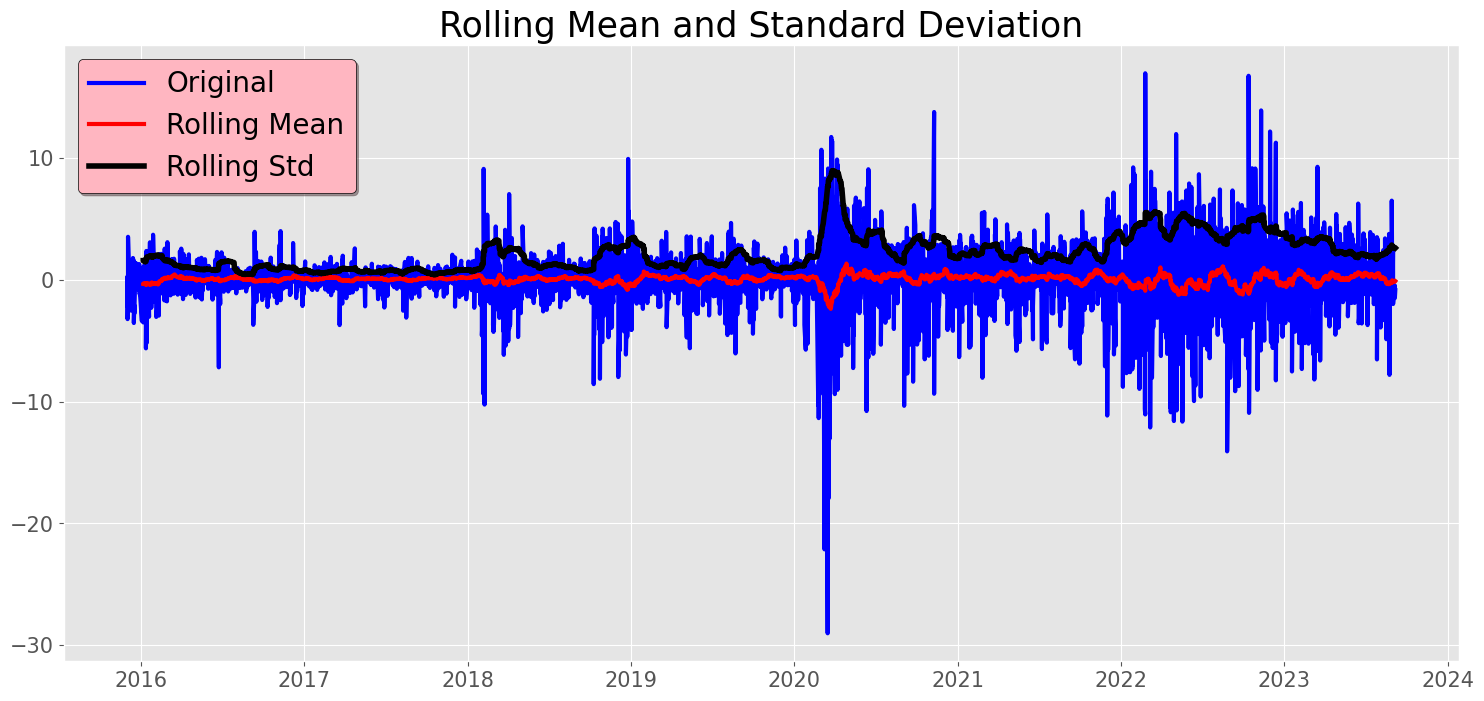

Results of dickey fuller test
Test Statistics               -1.401060e+01
p-value                        3.719728e-26
No. of lags used               1.700000e+01
Number of observations used    3.886000e+03
critical value (1%)           -3.432034e+00
critical value (5%)           -2.862284e+00
critical value (10%)          -2.567166e+00
dtype: float64


In [27]:
test_stationarity(df_close)

In [28]:
# Train and test data split
train_data = df_close[0:-60]
test_data = df_close[-60:]
train_data.shape,test_data.shape

((3844,), (60,))

In [29]:
train_data

date
2015-12-02   -2.086
2015-12-03    0.301
2015-12-03   -3.220
2015-12-04    0.470
2015-12-04    3.540
              ...  
2023-07-21    1.780
2023-07-21   -1.780
2023-07-24    1.190
2023-07-24    0.830
2023-07-25   -0.280
Name: price, Length: 3844, dtype: float64

In [30]:
test_data

date
2023-07-25    1.52
2023-07-26   -0.97
2023-07-26    1.04
2023-07-27    3.51
2023-07-27   -6.53
2023-07-28    3.39
2023-07-28    1.04
2023-07-31    0.49
2023-07-31    0.38
2023-08-01   -1.52
2023-08-01    0.21
2023-08-02   -3.23
2023-08-02   -3.12
2023-08-03   -2.09
2023-08-03    0.80
2023-08-04    1.88
2023-08-04   -3.91
2023-08-07    1.90
2023-08-07    2.00
2023-08-08   -2.63
2023-08-08    0.67
2023-08-09    0.28
2023-08-09   -3.28
2023-08-10    2.44
2023-08-10   -2.28
2023-08-11   -1.94
2023-08-11    1.68
2023-08-14   -0.95
2023-08-14    3.41
2023-08-15   -1.84
2023-08-15   -3.38
2023-08-16   -0.43
2023-08-16   -2.82
2023-08-17    1.52
2023-08-17   -4.87
2023-08-18   -2.92
2023-08-18    3.13
2023-08-21    1.05
2023-08-21    1.79
2023-08-22    1.84
2023-08-22   -3.03
2023-08-23    1.10
2023-08-23    3.78
2023-08-24    1.66
2023-08-24   -7.80
2023-08-25    1.79
2023-08-25    1.29
2023-08-28    2.27
2023-08-28    0.52
2023-08-29   -0.11
2023-08-29    6.51
2023-08-30    0.35
2023-08

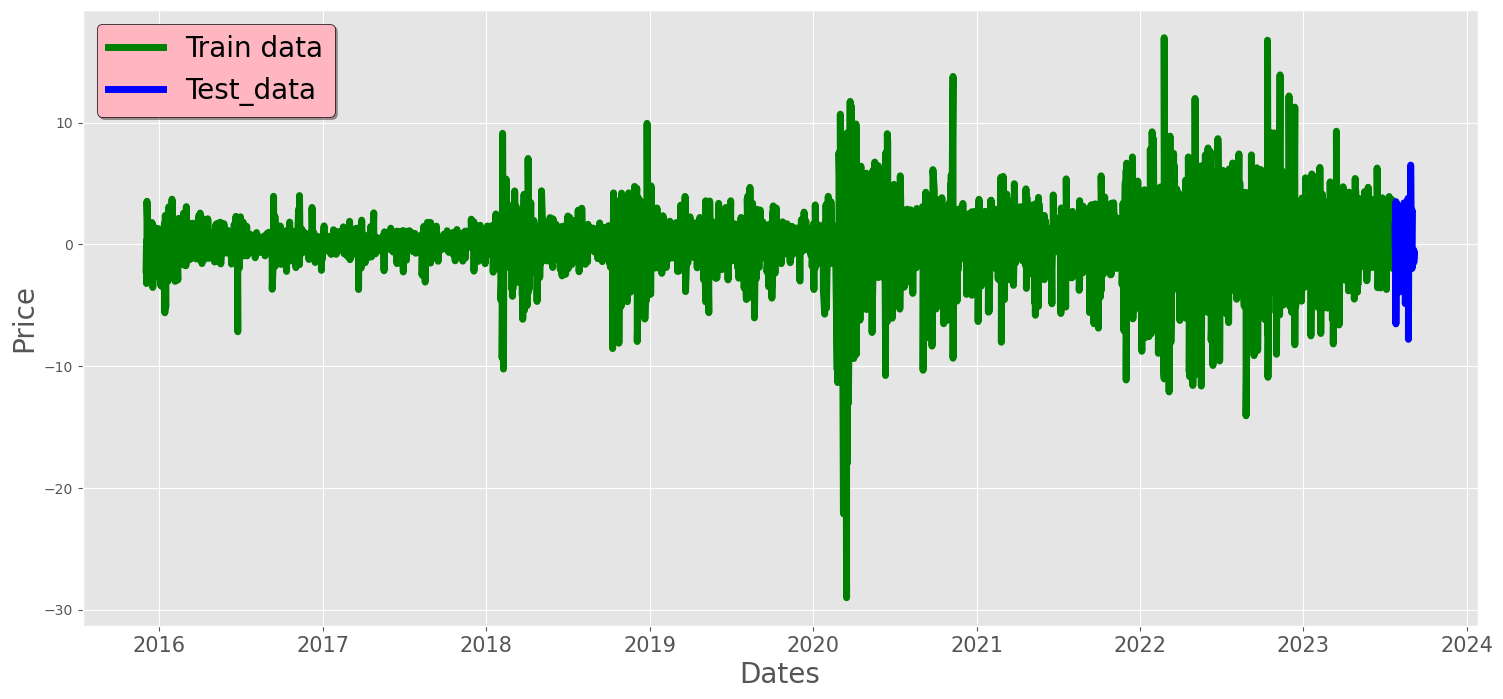

In [31]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.xticks(fontsize=15)
plt.xticks(fontsize=15)
plt.plot(train_data, 'green', label = 'Train data', linewidth =5)
plt.plot(test_data, 'blue', label='Test_data', linewidth=5)
plt.legend(fontsize=20, shadow=True, facecolor='lightpink', edgecolor='k')

## Model Building

In [32]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [33]:
history = [x for x in train_data]

In [34]:
model = ARIMA(history, order=(2,1,2))

In [35]:
model

In [36]:
model = model.fit()

In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3844
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -9188.496
Date:                Sat, 09 Sep 2023   AIC                          18386.991
Time:                        08:08:45   BIC                          18418.261
Sample:                             0   HQIC                         18398.098
                               - 3844                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0099      0.012    -81.016      0.000      -1.034      -0.985
ar.L2         -0.0111      0.010     -1.067      0.286      -0.031       0.009
ma.L1         -0.0009      3.426     -0.000      1.000      -6.716       6.715
ma.L2         -0.9991      3.424     -0.292      0.770      -7.709       5.711
sigma2         6.9658     23.865      0.292      0.770     -39.810      53.741
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             17086.99
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               7.01   Skew:                            -0.86
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
model.forecast()

array([0.05071679])

In [39]:
test_data[0]

1.5199999999999818

In [40]:
mean_squared_error([test_data[0]], model.forecast())

2.1587931613774565

In [41]:
# rmse
import numpy as np
np.sqrt(test_data[0], model.forecast())

array([1.2328828])

In [42]:
# assigning p,d,q values for checking at which point model perform best
p_value = range(0,3)
d_value = range(0,3)
q_value = range(0,3)

In [43]:
for i in p_value:
  for j in d_value:
    for k in q_value:
      print(i,j,k)

0 0 0
0 0 1
0 0 2
0 1 0
0 1 1
0 1 2
0 2 0
0 2 1
0 2 2
1 0 0
1 0 1
1 0 2
1 1 0
1 1 1
1 1 2
1 2 0
1 2 1
1 2 2
2 0 0
2 0 1
2 0 2
2 1 0
2 1 1
2 1 2
2 2 0
2 2 1
2 2 2


In [44]:
def train_arima_model(X,y, arima_order):
  #prepare training dataset
  #make predicting list
  history = [x for x in X]
  predictions = list()
  for t in range(len(y)):
    model = ARIMA(history, order=(arima_order))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(y[t])

  #calculate out of sample error
  rmse = np.sqrt(mean_squared_error(y, predictions))
  return rmse

In [45]:
def evaluate_models(dataset, test, p_value,d_value,  q_value ):
  dataset = dataset.astype('float32')
  best_score, best_cfg = float('inf') ,None
  for i in p_value:
    for j in d_value:
      for k in q_value:
        order = (i,j,k)
        try:
          rmse = train_arima_model(dataset, test,order)
          if rmse<best_score :
            best_score, best_cfd = rmse, order
            print('ARIMA%s  RMSE=%.3f' % (order,rmse))
        except:
          continue
  print('BEST ARIMA%s  RMSE=%.3f' % (best_score, best_cfg))

In [ ]:
#Arimax
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = ARIMA(history, order=(1,1,2))
    model_fit = model.fit()

    fc = model_fit.forecast()
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of arima model' , {np.sqrt(mean_squared_error(test_data, predictions))})

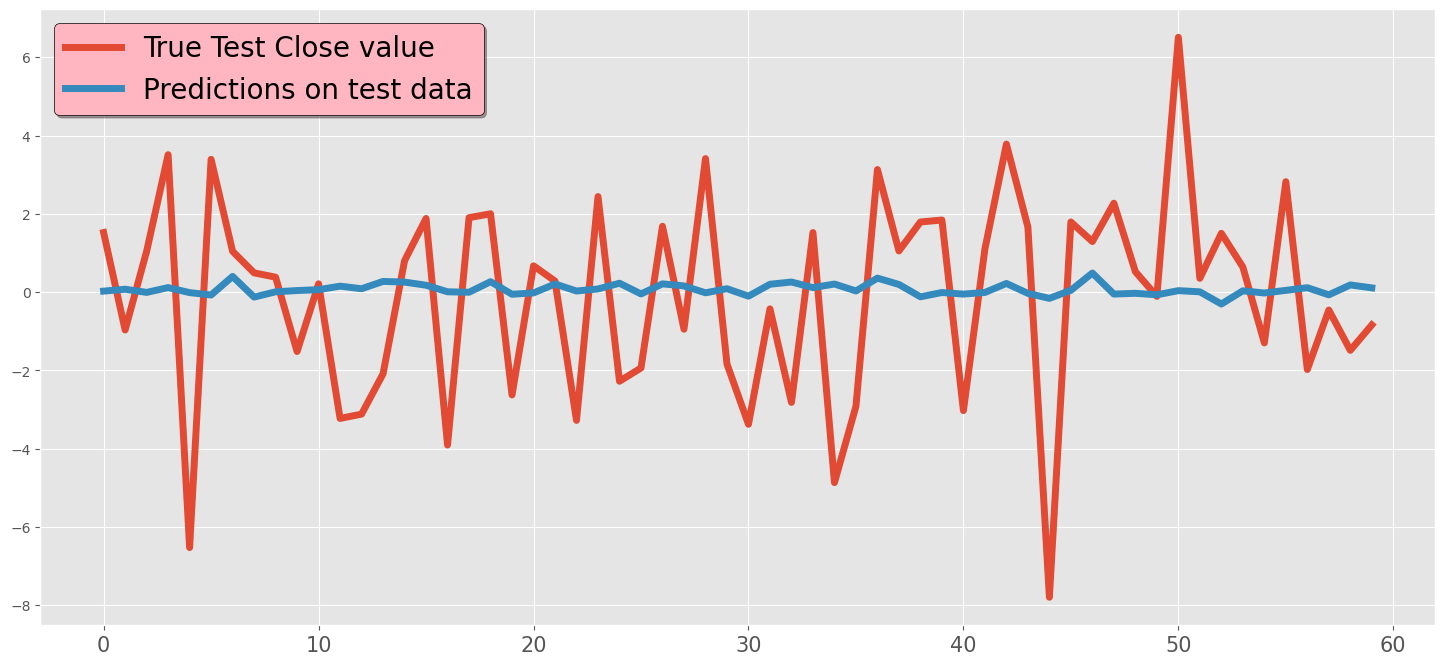

In [47]:
plt.figure(figsize=(18,8))
plt.plot(range(len(test_data)), test_data, label = 'True Test Close value',linewidth=5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth=5)
plt.xticks(fontsize=15)
plt.legend(fontsize=20, shadow=True, facecolor='lightpink', edgecolor='k')
plt.show()

In [52]:
# Predictions feature
fc_series = pd.Series(predictions, index=test_data.index)

In [53]:
fc_series

date
2023-07-25     [0.023221764969425976]
2023-07-26      [0.07209432550969912]
2023-07-26    [-0.009794839205517214]
2023-07-27       [0.1137397754187263]
2023-07-27    [-0.014813677487026028]
2023-07-28     [-0.07588455433514792]
2023-07-28        [0.399006551443942]
2023-07-31     [-0.12945656668481098]
2023-07-31     [0.006170452556634745]
2023-08-01     [0.037748795961581934]
2023-08-01      [0.06031238764154176]
2023-08-02      [0.15035114320336596]
2023-08-02      [0.08421095321127081]
2023-08-03       [0.2712952062494874]
2023-08-03       [0.2542936405218443]
2023-08-04       [0.1741023129347305]
2023-08-04    [0.0064940989729883325]
2023-08-07    [-0.005579032699543976]
2023-08-07       [0.2646559452220044]
2023-08-08    [-0.056537684039379706]
2023-08-08    [-0.022468264158661794]
2023-08-09      [0.20575157941109196]
2023-08-09     [0.025930002327930295]
2023-08-10      [0.07856777824781658]
2023-08-10      [0.22530646550360015]
2023-08-11    [-0.048610261366742596]
2023-08

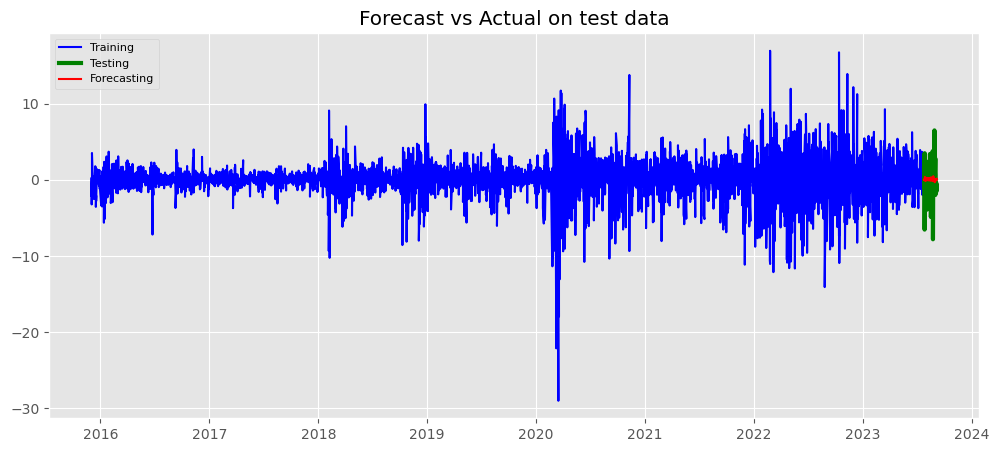

In [50]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Training',color='blue')
plt.plot(test_data, label='Testing', color='green',linewidth=3)
plt.plot(fc_series, label='Forecasting', color='red')
plt.title('Forecast vs Actual on test data')
plt.legend(loc='upper left', fontsize=8)
plt.show()

AttributeError: 'ARIMA' object has no attribute 'get_prediction'

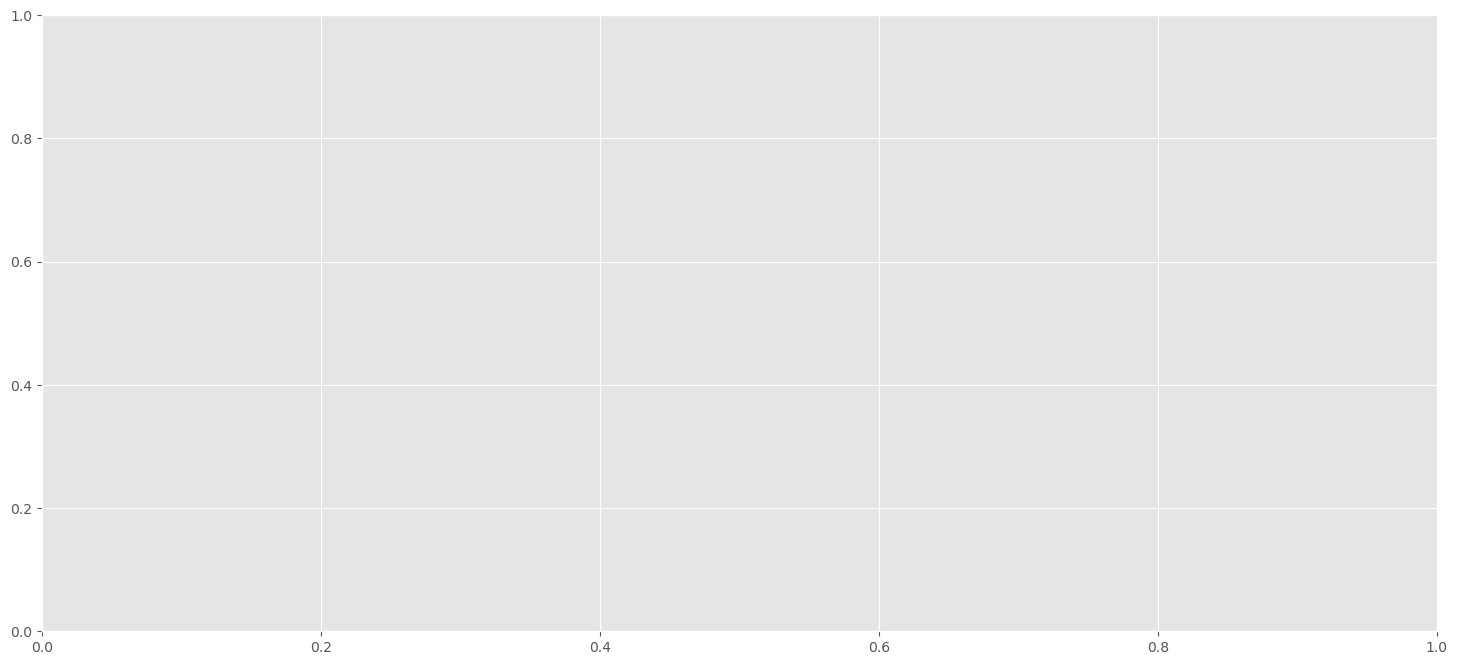

In [54]:
from statsmodels.graphics.tsaplots import plot_predict
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
plot_predict(result=model, start=1, end= len(df_close)+60, ax=ax1)
plt.grid('both')
plt.legend(['Forecast', 'price', '95% Confidence Interval'], fontsize=20, shadow=True, facecolor='lightblue', edgecolor='k' )
plt.show()